# WeatherPy
----

## Analysis
----

#### General comments
* We are only studying data that exists in cities, which means our data are biased toward places that humans have decided to settle, which might remove some extreme values from our sample.
* Though little data exists for cities below the negative-40 latitude (due to a higher concentration of habitable landmass at higher latitudes), the regression lines make it possible to predict what those values might be.
* It would be interesting to re-run this analysis during different parts of the calendar year. Would any of the regression lines be steeper in July -- when parts of one hemisphere is in the dead of summer, and parts of the other hemisphere are in the dead of winter -- compared to April?
* Just as we have split the data into hemispheres, it would also be interesting to re-run this analysis on tropical zones and tepid zones.
* General questison: how do weather systems moving through the globe affect the shape of regression lines? Do these systems tend to recur at predictable intervals?


#### Observation 1: Max temperatures increase near the equator
* The regression lines show stronger correlation between a city's latitude and its maximum temperature than any other observed metric.
* As a city is closer to the equator, its max temperature tends to be higher. This trend hold across both northern and southern hemispheres.

#### Observation 2: Humidity and cloudiness increase with latitude
* The regression lines consistently show slight positive correlation between a city's latitude and its percentages of humidity and cloudiness.
* As a city is further north, its humidity and cloudiness increase. This trend is barely visible when simply viewing the data as a whole, and becomes somewhat more apparent when calculating hemispheric regression lines.

#### Observation 3: Wind speed is difficult to predict
* The regression lines inconsistently show correlation between a city's latitude and its wind speed.
* For cities in the northern hemisphere, as a city is further north, its wind speed usually inreases a little bit.
* For cities in the southern hemisphere, different samples have shown different trends (sometimes increasing toward the equator, sometimes decreasing).

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Ensure there are at least 500 cities to look for
enough_cities = "no"
while enough_cities == "no":

    # Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)

    print(len(cities))
    
    # Check the city count to confirm sufficient count
    if len(cities) >= 500:
        enough_cities = "yes"
        

597


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Documentation on units: https://openweathermap.org/weather-data

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Build container variables for storing weather data
city_name = []
city_cloudiness = []
city_country = []
city_date = []
city_humidity = []
city_lat = []
city_lng = []
city_max_temp = []
city_wind_speed = []

# Store loop counting variables
city_count = 1
set_count = 1

In [4]:
# Use a loop to search for data on every city
for x in cities:
    
    # Create variables for storing the data
    response = requests.get(query_url + x)
    response_json = response.json()
    
    # Log current record attempt
    print(f"Processing Record {city_count} of Set {set_count} | {x}")
    
    # Log data in "sets" of 50
    if city_count % 50 == 0:
        city_count = 1
        set_count += 1
    else:
        city_count +=1
    
    # Anticipate data collection errors and build multiple series of data points if successful
    try:
        city_cloudiness.append(response_json['clouds']['all'])
        city_country.append(response_json['sys']['country'])
        city_date.append(response_json['dt'])
        city_humidity.append(response_json['main']['humidity'])
        city_lat.append(response_json['coord']['lat'])
        city_lng.append(response_json['coord']['lon'])
        city_max_temp.append(response_json['main']['temp_max'])
        city_wind_speed.append(response_json['wind']['speed'])
        
        # Even though we alraedy have the city names as "cities", we only want to use the ones with data
        city_name.append(x)
        
    except:
        
        # Makes a note if data was not found in OpenWeather for a particular city
        print("City not found. Skipping...")
        pass

Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | honningsvag
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | half moon bay
Processing Record 5 of Set 1 | levanger
Processing Record 6 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | ilebo
Processing Record 9 of Set 1 | faya
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | mrirt
City not found. Skipping...
Processing Record 13 of Set 1 | guerrero negro
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | walvis bay
Processing Record 16 of Set 1 | otane
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | brodick
Processing Record 19 of Set 1 | gumdag
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | cristalina
Processing Record 22 of Set 1 | lasa
Processing Record 23 of Set 1 | spirit river
Pr

Processing Record 37 of Set 4 | altagracia de orituco
Processing Record 38 of Set 4 | jumla
Processing Record 39 of Set 4 | barrow
Processing Record 40 of Set 4 | goderich
Processing Record 41 of Set 4 | san quintin
Processing Record 42 of Set 4 | arraial do cabo
Processing Record 43 of Set 4 | belyy yar
Processing Record 44 of Set 4 | kendari
Processing Record 45 of Set 4 | juneau
Processing Record 46 of Set 4 | rio gallegos
Processing Record 47 of Set 4 | gaya
Processing Record 48 of Set 4 | bethel
Processing Record 49 of Set 4 | atherton
Processing Record 50 of Set 4 | solntsevo
Processing Record 1 of Set 5 | tuatapere
Processing Record 2 of Set 5 | pitimbu
Processing Record 3 of Set 5 | saint-pierre
Processing Record 4 of Set 5 | akdagmadeni
Processing Record 5 of Set 5 | south venice
Processing Record 6 of Set 5 | babanusah
City not found. Skipping...
Processing Record 7 of Set 5 | broken hill
Processing Record 8 of Set 5 | pisco
Processing Record 9 of Set 5 | east london
Processi

Processing Record 31 of Set 8 | bom jardim
Processing Record 32 of Set 8 | pacific grove
Processing Record 33 of Set 8 | dunedin
Processing Record 34 of Set 8 | san vicente de canete
Processing Record 35 of Set 8 | namibe
Processing Record 36 of Set 8 | eldorado
Processing Record 37 of Set 8 | armacao dos buzios
City not found. Skipping...
Processing Record 38 of Set 8 | marsa matruh
Processing Record 39 of Set 8 | coquimbo
Processing Record 40 of Set 8 | anchorage
Processing Record 41 of Set 8 | vila franca do campo
Processing Record 42 of Set 8 | roma
Processing Record 43 of Set 8 | waipawa
Processing Record 44 of Set 8 | bilma
Processing Record 45 of Set 8 | diego de almagro
Processing Record 46 of Set 8 | detchino
Processing Record 47 of Set 8 | los llanos de aridane
Processing Record 48 of Set 8 | salalah
Processing Record 49 of Set 8 | mwense
Processing Record 50 of Set 8 | stephenville
Processing Record 1 of Set 9 | darhan
Processing Record 2 of Set 9 | urumqi
Processing Record 

Processing Record 21 of Set 12 | olafsvik
Processing Record 22 of Set 12 | dibaya
City not found. Skipping...
Processing Record 23 of Set 12 | bandarban
Processing Record 24 of Set 12 | ust-kuyga
Processing Record 25 of Set 12 | sibolga
Processing Record 26 of Set 12 | amga
Processing Record 27 of Set 12 | maxixe
Processing Record 28 of Set 12 | abu dhabi
Processing Record 29 of Set 12 | bowen
Processing Record 30 of Set 12 | rio grande
Processing Record 31 of Set 12 | umm lajj
Processing Record 32 of Set 12 | concarneau
Processing Record 33 of Set 12 | cidreira
Processing Record 34 of Set 12 | passos
Processing Record 35 of Set 12 | kudat
Processing Record 36 of Set 12 | sabya
Processing Record 37 of Set 12 | forest grove
Processing Record 38 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 39 of Set 12 | tura
Processing Record 40 of Set 12 | nadym
Processing Record 41 of Set 12 | salinas
Processing Record 42 of Set 12 | pitiquito
Processing Record 43 of Set 12 | d

In [5]:
# Create a dictionary to store the collected weather data
weather_dict = {
    "City": city_name,
    "Cloudiness": city_cloudiness,
    "Country": city_country,
    "Date": city_date,
    "Humidity": city_humidity,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Wind Speed": city_wind_speed
}

# Store the weather data in a DataFrame
weather_data = pd.DataFrame(weather_dict)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Export to csv
weather_data.to_csv("Output/weather_data.csv", index_label="ID")

In [7]:
# Print the DataFrame header
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tasiilaq,75,GL,1585931806,53,65.61,-37.64,24.8,17.22
1,honningsvag,95,NO,1585931879,79,70.98,25.97,21.2,12.75
2,hobart,90,AU,1585931879,77,-42.88,147.33,59.0,5.82
3,half moon bay,1,US,1585931879,62,37.46,-122.43,54.0,17.22
4,levanger,75,NO,1585931880,89,63.75,11.30,32.0,25.28


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
# Get current time to print in plot titles
time_label = time.strftime("%Y-%m-%d")

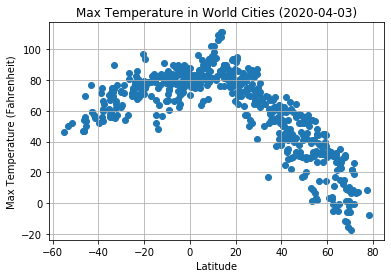

In [9]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_max_temp, marker="o")

# Incorporate the other graph properties
plt.title("Max Temperature in World Cities (" + time_label + ")")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

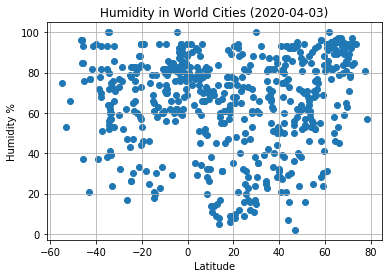

In [10]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_humidity, marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities (" + time_label + ")")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

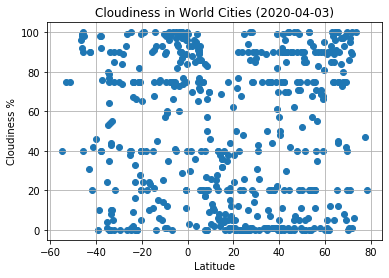

In [11]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_cloudiness, marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities (" + time_label + ")")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

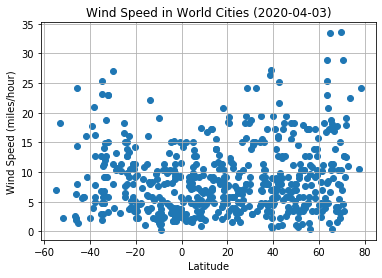

In [12]:
# Build a scatter plot for each data type
plt.scatter(city_lat, city_wind_speed, marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities (" + time_label + ")")
plt.ylabel("Wind Speed (miles/hour)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [13]:
# Create a function to calculate and plot regression data
def lingressplot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    print(f"The formula for the regression line is: {line_eq}.")

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data[(weather_data.Lat >= 0)]
southern_df = weather_data[(weather_data.Lat < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7940306380295318
The formula for the regression line is: y = -1.21x +99.31.


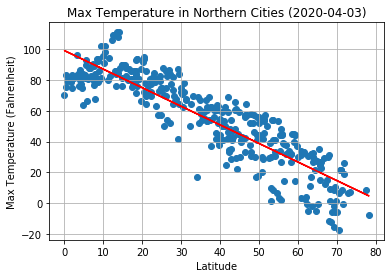

In [15]:
# Build a scatter plot for each data type
plt.scatter(northern_df.Lat, northern_df["Max Temp"], marker="o")

# Run the regression plotting function
lingressplot(northern_df.Lat,northern_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Max Temperature in Northern Cities (" + time_label + ")")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/TemperatureInNorthernCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.41073324285140045
The formula for the regression line is: y = 0.49x +82.59.


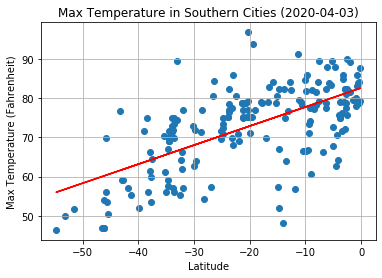

In [16]:
# Build a scatter plot for each data type
plt.scatter(southern_df.Lat, southern_df["Max Temp"], marker="o")

# Run the regression plotting function
lingressplot(southern_df.Lat,southern_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Max Temperature in Southern Cities (" + time_label + ")")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/TemperatureInSouthernCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0726067203196846
The formula for the regression line is: y = 0.32x +51.06.


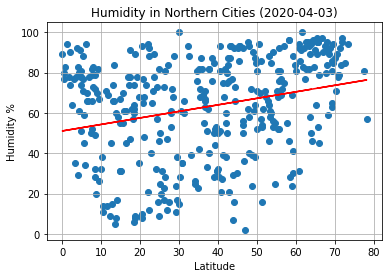

In [17]:
# Build a scatter plot for each data type
plt.scatter(northern_df.Lat, northern_df.Humidity, marker="o")

# Run the regression plotting function
lingressplot(northern_df.Lat,northern_df.Humidity)

# Incorporate the other graph properties
plt.title("Humidity in Northern Cities (" + time_label + ")")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/HumidityInNorthernCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0123925742270608
The formula for the regression line is: y = 0.16x +72.95.


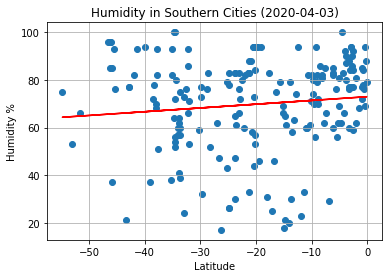

In [18]:
# Build a scatter plot for each data type
plt.scatter(southern_df.Lat, southern_df.Humidity, marker="o")

# Run the regression plotting function
lingressplot(southern_df.Lat,southern_df.Humidity)

# Incorporate the other graph properties
plt.title("Humidity in Southern Cities (" + time_label + ")")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/HumidityInSouthernCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03476229887955793
The formula for the regression line is: y = 0.33x +34.69.


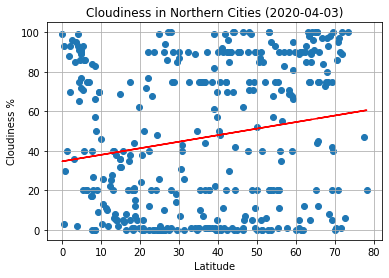

In [19]:
# Build a scatter plot for each data type
plt.scatter(northern_df.Lat, northern_df.Cloudiness, marker="o")

# Run the regression plotting function
lingressplot(northern_df.Lat,northern_df.Cloudiness)

# Incorporate the other graph properties
plt.title("Cloudiness in Northern Cities (" + time_label + ")")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/CloudinessInNorthernCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03874872883590684
The formula for the regression line is: y = 0.5x +67.79.


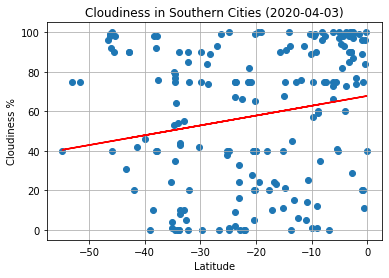

In [20]:
# Build a scatter plot for each data type
plt.scatter(southern_df.Lat, southern_df.Cloudiness, marker="o")

# Run the regression plotting function
lingressplot(southern_df.Lat,southern_df.Cloudiness)

# Incorporate the other graph properties
plt.title("Cloudiness in Southern Cities (" + time_label + ")")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/CloudinessInSouthernCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.043958695106677
The formula for the regression line is: y = 0.06x +6.9.


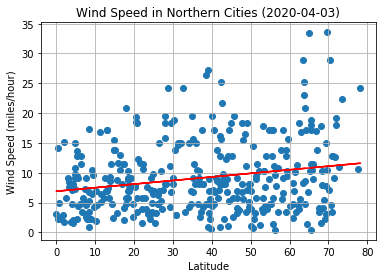

In [21]:
# Build a scatter plot for each data type
plt.scatter(northern_df.Lat, northern_df["Wind Speed"], marker="o")

# Run the regression plotting function
lingressplot(northern_df.Lat,northern_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Wind Speed in Northern Cities (" + time_label + ")")
plt.ylabel("Wind Speed (miles/hour)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/WindSpeedInNorthernCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.058676751531210776
The formula for the regression line is: y = -0.1x +6.26.


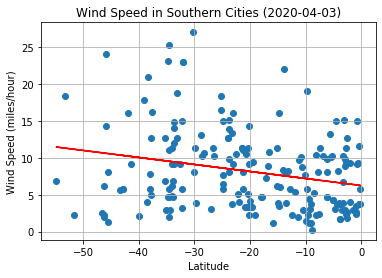

In [22]:
# Build a scatter plot for each data type
plt.scatter(southern_df.Lat, southern_df["Wind Speed"], marker="o")

# Run the regression plotting function
lingressplot(southern_df.Lat,southern_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Wind Speed in Southern Cities (" + time_label + ")")
plt.ylabel("Wind Speed (miles/hour)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/WindSpeedInSouthernCities.png")

# Show plot
plt.show()